## Clusterização

In [1]:
# Importando as bibliotecas para iniciar as análises

import pandas as pd
import numpy as np
import plotly.graph_objs as go
from biokit.viz import corrplot
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Importando base de dados

url = 'https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv'
dados = pd.read_csv(url)
dados.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
# Retornando estrutura do banco de dados

dados.shape

(178, 14)

In [4]:
# Realizando configurações básicas de visualização do data frame

pd.set_option('display.max_columns', 14)
pd.set_option('display.max_rows', 178)

In [5]:
# Renomeando os nomes das principais features

dados = dados.rename(columns={
    "Alcohol": "Alcool",
    "Ash": "Po",
    "Ash_Alcanity": "Alcalinidade_po",
    "Magnesium": "Magnesio",
    "Color_Intensity": "Intesidade_cor",
    "Malic_Acid": "Acido_Malico"
})

dados.head()

,Alcool,Acido_Malico,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intesidade_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
# Retornando estatísticas do banco de dados

dados.describe()

,Alcool,Acido_Malico,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intesidade_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


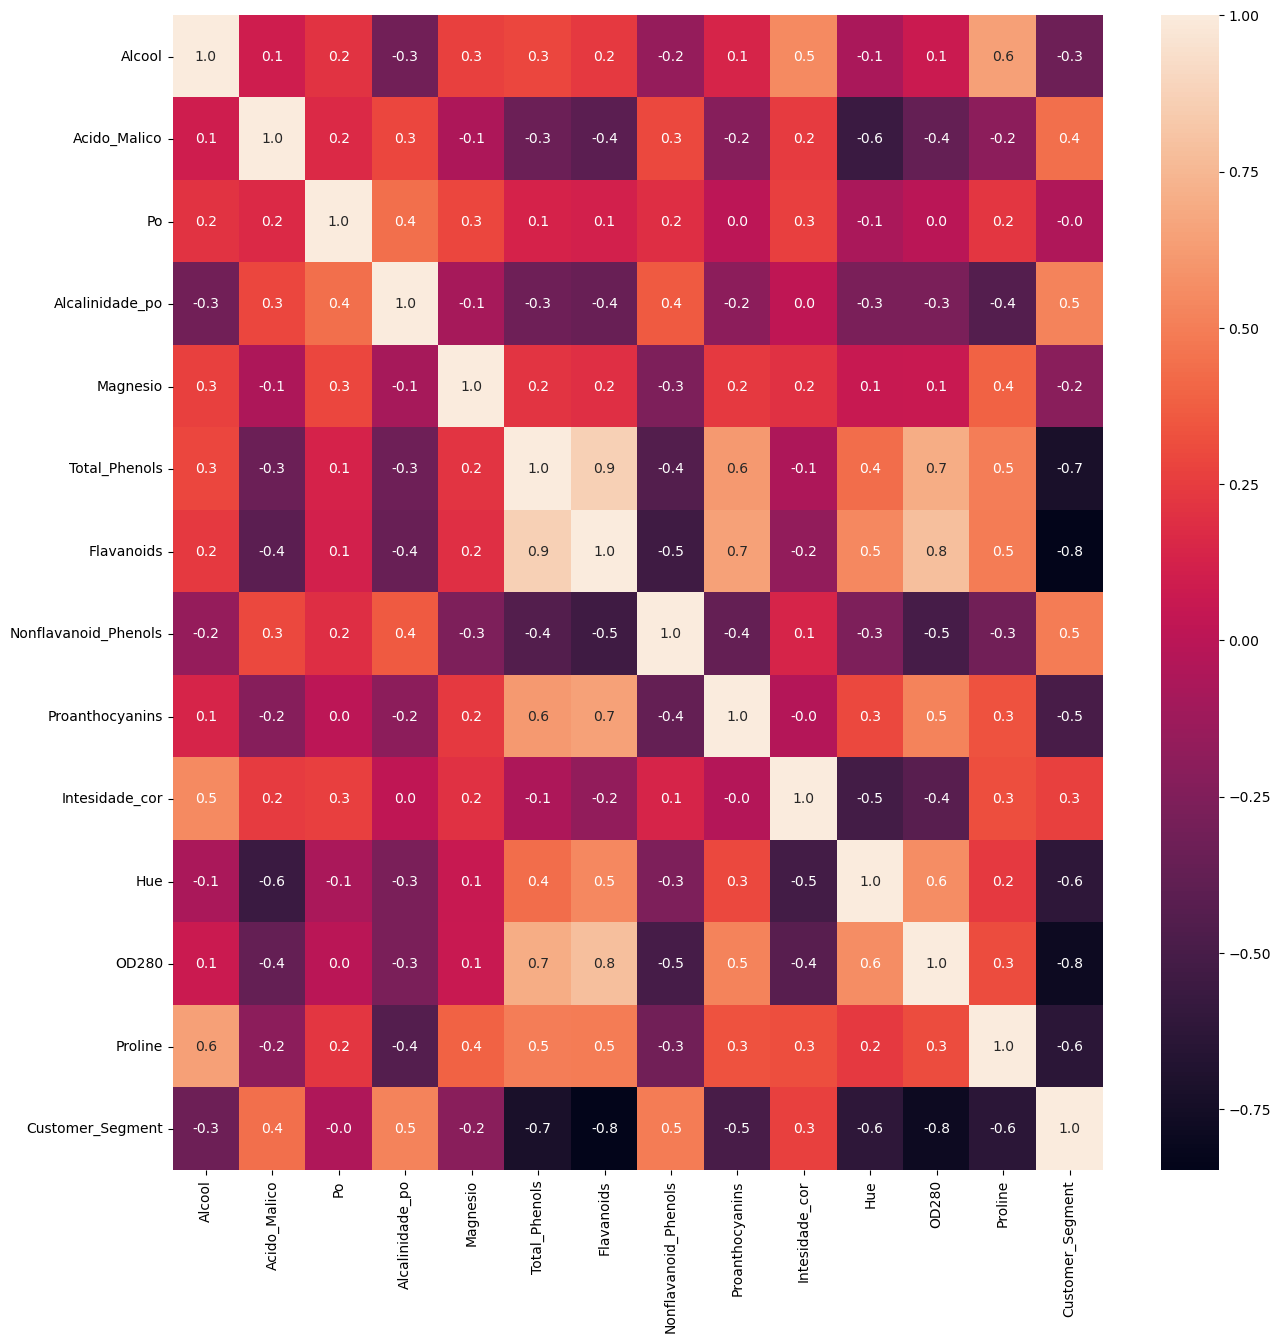

In [7]:
# Utilizando seaborn para avaliar matriz de correlação

matriz_correlacao = dados.corr()
plt.figure(figsize=(15,15))
sns.heatmap(matriz_correlacao, annot=True, fmt='.1f')
plt.show()

In [8]:
# Importando biblioteca para realizar normalização dos dados

from sklearn import preprocessing

In [9]:
# Instanciando modelo e realizando normalização

min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(dados)

In [10]:
# Armazenando dados normalizados em um dataframe

df = pd.DataFrame(np_df, columns=dados.keys())
df.describe()

,Alcool,Acido_Malico,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intesidade_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Por curiosidade realizarei a desnormalização do dataframe

np_df2 = min_max_scaler.inverse_transform(np_df)
df2 = pd.DataFrame(np_df2, columns=dados.keys())
df2.head()

,Alcool,Acido_Malico,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intesidade_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.0


In [12]:
# Utilizaremos as técnicas de clusterização 

from sklearn.cluster import KMeans

In [13]:
# Instanciando e treinando o modelo

agrupador = KMeans(n_clusters=4)
agrupador.fit(df)

KMeans(n_clusters=4)

In [14]:
# Obtendo os grupos de cada registro

labels = agrupador.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 3 2 3 3 3 2 3 2 3 2 3
 3 2 3 2 3 3 3 3 2 2 3 3 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 2 3 2 3 2 2 2 3 3 3
 3 2 2 2 2 3 3 2 3 3 3 3 3 3 3 3 2 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [15]:
# Plotando os grupos

from plotly import graph_objs as go


fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Intesidade_cor, 
                         y=df.Alcool, 
                         mode='markers', 
                         marker=dict(color=agrupador.labels_.astype(np.float)), 
                         text=labels))
fig.show()

In [16]:
# Reduzindo os grupos e representando graficamente novamente 

agrupador = KMeans(n_clusters=3)
agrupador.fit(df)
labels = agrupador.labels_

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Intesidade_cor, 
                         y=df.Alcool, 
                         mode='markers', 
                         marker=dict(color=agrupador.labels_.astype(np.float)), 
                         text=labels))
fig.show()

In [17]:
# Plotando os dados em 2D

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df.Intesidade_cor,
                           y = df.Alcool,
                           z = df.Proline,
                           mode='markers',
                           marker=dict(color=labels.astype(np.float)),
                           text=labels))
fig.show()

In [21]:
fig.update_layout(scene=dict(
    xaxis_title = df['Intesidade_cor'],
    yaxis_title = df['Alcool'],
    zaxis_title = df['Proline'],
    ))
fig.show()

ValueError: 
    Invalid value of type 'pandas.core.series.Series' received for the 'title' property of layout.scene.xaxis
        Received value: 0      0.372014
1      0.264505
2      0.375427
3      0.556314
4      0.259386
5      0.466724
6      0.338737
7      0.321672
8      0.334471
9      0.506826
10     0.381399
11     0.317406
12     0.368601
13     0.351536
14     0.530717
15     0.513652
16     0.419795
17     0.453925
18     0.633106
19     0.325939
20     0.372867
21     0.274744
22     0.215017
23     0.226109
24     0.191126
25     0.196246
26     0.300341
27     0.227816
28     0.274744
29     0.291809
30     0.377133
31     0.479522
32     0.218430
33     0.351536
34     0.249147
35     0.325939
36     0.283276
37     0.253413
38     0.206485
39     0.325939
40     0.413823
41     0.255973
42     0.354096
43     0.262799
44     0.320819
45     0.337884
46     0.308874
47     0.411263
48     0.419795
49     0.650171
50     0.505119
51     0.368601
52     0.492321
53     0.428328
54     0.389932
55     0.424061
56     0.435154
57     0.402730
58     0.470990
59     0.057167
60     0.169795
61     0.381399
62     0.215017
63     0.270478
64     0.142491
65     0.283276
66     0.343003
67     0.290102
68     0.161263
69     0.133959
70     0.151024
71     0.179181
72     0.209898
73     0.176621
74     0.164676
75     0.215017
76     0.283276
77     0.116894
78     0.180887
79     0.110068
80     0.104096
81     0.223549
82     0.078498
83     0.300341
84     0.151024
85     0.114334
86     0.099829
87     0.112628
88     0.129693
89     0.039249
90     0.095563
91     0.197952
92     0.151024
93     0.074232
94     0.168089
95     0.112628
96     0.104096
97     0.138225
98     0.274744
99     0.087031
100    0.172355
101    0.099829
102    0.129693
103    0.066553
104    0.141638
105    0.121160
106    0.180887
107    0.172355
108    0.121160
109    0.116894
110    0.138225
111    0.061433
112    0.215017
113    0.153584
114    0.138225
115    0.052901
116    0.057167
117    0.066553
118    0.180887
119    0.000000
120    0.168089
121    0.402730
122    0.068259
123    0.112628
124    0.129693
125    0.126280
126    0.226962
127    0.146758
128    0.071672
129    0.112628
130    0.240614
131    0.351536
132    0.377133
133    0.317406
134    0.355802
135    0.496587
136    0.219283
137    0.317406
138    0.377133
139    0.310580
140    0.283276
141    0.368601
142    0.261945
143    0.266212
144    0.591297
145    0.232082
146    0.308874
147    0.543515
148    0.609215
149    0.692833
150    0.624573
151    0.812287
152    0.496587
153    0.788396
154    0.539249
155    0.564846
156    0.659556
157    0.530717
158    1.000000
159    0.893345
160    0.543515
161    0.392491
162    0.366894
163    0.341297
164    0.708191
165    0.455631
166    0.802048
167    0.766212
168    0.629693
169    0.616041
170    0.360068
171    0.735495
172    0.718430
173    0.547782
174    0.513652
175    0.761092
176    0.684300
177    0.675768
Name: Intesidade_cor, dtype: float64

    The 'title' property is an instance of Title
    that may be specified as:
      - An instance of plotly.graph_objs.layout.scene.xaxis.Title
      - A dict of string/value properties that will be passed
        to the Title constructor

        Supported dict properties:
            
            font
                Sets this axis' title font. Note that the
                title's font used to be customized by the now
                deprecated `titlefont` attribute.
            text
                Sets the title of this axis. Note that before
                the existence of `title.text`, the title's
                contents used to be defined as the `title`
                attribute itself. This behavior has been
                deprecated.


In [22]:
# Obtendo os dados de centro dos clusters para plotar 

centros = pd.DataFrame(agrupador.cluster_centers_, columns=dados.keys())
centros.head()

,Alcool,Acido_Malico,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intesidade_cor,Hue,OD280,Proline,Customer_Segment
0,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333
1,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796
2,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000


In [23]:
# Plotando os dados com os centros

fig.add_trace(go.Scatter3d(x=centros.Intesidade_cor,
                           y=centros.Alcool,
                           z=centros.Proline,
                           mode='markers',
                           marker=dict(color='red'),
                           text=[0, 1, 2]))
fig.show()

## DBSCAN

In [24]:
# Importando biblioteca DBSCAN

from sklearn.cluster import DBSCAN

In [25]:
# Instanciando e treinando modelo

agrupador = DBSCAN(eps=1.31, min_samples=15, metric='manhattan')
agrupador.fit(df)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [26]:
# Retornando os rotulos dos grupos

agrupador.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

In [27]:
# Verificando os rotulos unicos

np.unique(agrupador.labels_)

array([-1,  0,  1,  2], dtype=int64)

In [49]:
# Instanciando modelo com número de clusters reduzidos

agrupador = DBSCAN(eps=1.5, min_samples=15, metric='manhattan')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  2,  2,  2,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

##

## MeanShift

In [50]:
# Importando biblioteca

from sklearn.cluster import MeanShift

In [52]:
# Instanciando e treinando modelo

agrupador = MeanShift()
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [53]:
# Importando lib para poder estimar a largura de banda do modelo

from sklearn.cluster import estimate_bandwidth

In [64]:
# Configurando função

BW = estimate_bandwidth(X=df, quantile=0.2, n_jobs=2)
agrupador = MeanShift(bandwidth=BW)
agrupador.fit(df)
agrupador.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)